# **Automatidata project**
**Course 6 - The Nuts and bolts of machine learning**

You are a data professional in a data analytics firm called Automatidata. Their client, the New York City Taxi & Limousine Commission (New York City TLC), was impressed with the work you have done and has requested that you build a machine learning model to predict if a customer will not leave a tip. They want to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 6 End-of-course project: Build a machine learning model

In this activity, you will practice using tree-based modeling techniques to predict on a binary target class.  
<br/>   

**The purpose** of this model is to find ways to generate more revenue for taxi cab drivers.  
  
**The goal** of this model is to predict whether or not a customer is a generous tipper.  
<br/>  

*This activity has three parts:*

**Part 1:** Ethical considerations 
* Consider the ethical implications of the request 

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, complete an Executive Summary using the questions listed on the PACE Strategy Document. 

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work. 



# Build a machine learning model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: Plan 

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:

1.   What are you being asked to do?


2.   What are the ethical implications of the model? What are the consequences of your model making errors?
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a customer will give a tip, but they actually won't)?
  
  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a customer will not give a tip, but they actually will)?  
  
  
3.   Do the benefits of such a model outweigh the potential problems?
  
4.   Would you proceed with the request to build this model? Why or why not?
 
5.   Can the objective be modified to make it less problematic?
 


Certainly, let's address these questions:

**1. What are you being asked to do?**
We are being asked to build a random forest model that predicts whether a rider will give a generous tip (>= 20%) or not based on various factors, with the goal of providing insights to improve driver satisfaction and gratuity amounts for the New York City TLC.

**2. What are the ethical implications of the model? What are the consequences of your model making errors?**
   * The ethical implications involve potential privacy concerns related to predicting rider behavior and gratuity amounts. Additionally, there's a risk of bias in the model's predictions, leading to unfair treatment or discrimination against certain riders or drivers.
   * A false negative prediction could result in drivers missing out on expected gratuity, leading to dissatisfaction and potentially affecting their income.
   * A false positive prediction might cause drivers to expect gratuity that doesn't materialize, potentially leading to disappointment and affecting the overall rider-driver relationship.

**3. Do the benefits of such a model outweigh the potential problems?**
The benefits include potential improvements in driver satisfaction and income, which can contribute to a positive rider experience and enhanced service quality. However, the potential problems, including ethical concerns and the impact of prediction errors, need to be carefully weighed against these benefits.

**4. Would you proceed with the request to build this model? Why or why not?**
Proceeding with building the model is possible, but it requires meticulous attention to ethical considerations, bias mitigation, and transparency. Model evaluation should prioritize fairness and avoiding significant negative consequences for drivers or riders due to prediction errors.

**5. Can the objective be modified to make it less problematic?**
Yes, the objective could be modified to focus on understanding rider behavior and factors influencing gratuity amounts, without directly predicting whether an individual rider will give a tip or not. This could help mitigate some ethical concerns while still providing valuable insights to improve overall rider-driver interactions.

These considerations highlight the need for a balanced approach that takes into account both the potential benefits and the ethical implications of building such a predictive model.

Suppose you were to modify the modeling objective so, instead of predicting people who won't tip at all, you predicted people who are particularly generous&mdash;those who will tip 20% or more? Consider the following questions:

1.  What features do you need to make this prediction?

2.  What would be the target variable?  

3.  What metric should you use to evaluate your model? Do you have enough information to decide this now?


Certainly, let's address these questions in the context of modifying the modeling objective to predict people who are particularly generous (those who will tip 20% or more):

**1. What features do you need to make this prediction?**
To predict people who are particularly generous tippers, you would need a set of relevant features that could influence tipping behavior. These features might include factors such as:
   * Total fare amount
   * Trip distance
   * Payment method
   * Trip duration
   * Type of ride (e.g., shared, individual)
   * Time of day or day of the week
   * Customer rating of the driver
   * Customer rating of the ride experience

**2. What would be the target variable?**
The target variable would be a binary variable indicating whether a rider is particularly generous (1) or not (0), based on the criterion of tipping 20% or more of the fare amount.

**3. What metric should you use to evaluate your model? Do you have enough information to decide this now?**
In this case, we can use metrics such as precision, recall, F1-score, and ROC-AUC to evaluate your model's performance. Since the objective is to identify particularly generous tippers, precision and recall are important metrics to assess the model's ability to correctly predict these instances while minimizing false positives and false negatives.

However, the choice of the specific metric depends on the business context and the relative importance of different types of prediction errors. For example, if it's more critical to minimize false positives (predicting someone as generous when they're not), then precision might be more important. If it's more critical to minimize false negatives (missing out on predicting a generous tipper), then recall might be more important. The final choice of metric should be made in consultation with stakeholders and considering the potential impact of prediction errors on driver satisfaction and overall business goals.


**_Complete the following steps to begin:_**

### **Task 1. Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [1]:
# Import packages and libraries
### YOUR CODE HERE ###
import numpy as np
import pandas as pd

# This is the classifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, PredefinedSplit, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# This is for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# This is the function that helps plot feature importance
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle

In [2]:
# RUN THIS CELL TO SEE ALL COLUMNS 
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

Begin by reading in the data. There are two dataframes: one containing the original data, the other containing the mean durations, mean distances, and predicted fares from the previous course's project called nyc_preds_means.csv.

**Note:** `Pandas` reads in the dataset as `df0`, now inspect the first five rows. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THE CELL BELOW TO IMPORT YOUR DATA. 

# Load dataset into dataframe
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

# Import predicted fares and mean distance and duration from previous course
nyc_preds_means = pd.read_csv('nyc_preds_means.csv')

Inspect the first few rows of `df0`.


In [4]:
# Inspect the first few rows of df0
### YOUR CODE HERE ###
df0.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


Inspect the first few rows of `nyc_preds_means`.

In [5]:
# Inspect the first few rows of `nyc_preds_means`
### YOUR CODE HERE ###
nyc_preds_means.head(10)

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642
5,11.855376,2.052258,10.441351
6,59.633333,12.830000,45.374542
7,26.437500,4.022500,18.555128
8,7.873457,1.019259,7.151511
9,10.541111,1.580000,9.122755


#### Join the two dataframes

Join the two dataframes using a method of your choice.

In [6]:
# Merge datasets
### YOUR CODE HERE ###
merged_df = df0.merge(nyc_preds_means, left_index=True, right_index=True)
merged_df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,14.616667,4.435000,15.845642


<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

Consider the questions in your PACE Strategy Documentto reflect on the Analyze stage.

### **Task 2. Feature engineering**

You have already prepared much of this data and performed exploratory data analysis (EDA) in previous courses. 

Call `info()` on the new combined dataframe.

In [7]:
#==> ENTER YOUR CODE HERE
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

You know from your EDA that customers who pay cash generally have a tip amount of $0. To meet the modeling objective, you'll need to sample the data to select only the customers who pay with credit card. 

Copy `df0` and assign the result to a variable called `df1`. Then, use a Boolean mask to filter `df1` so it contains only customers who paid with credit card.

In [8]:
# Subset the data to isolate only customers who paid by credit card
#==> ENTER YOUR CODE HERE
# Create a copy of df0
df1 = df0.copy()

# Use a boolean mask to filter customers who paid by credit card
df1 = df1[df1['payment_type'] == 1]


##### **Target**

Notice that there isn't a column that indicates tip percent, which is what you need to create the target variable. You'll have to engineer it. 

Add a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  


In [9]:
# Create tip % col
#==> ENTER YOUR CODE HERE

df1['tip_percent'] = df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount'])


Now create another column called `generous`. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

1. Begin by making the `generous` column a copy of the `tip_percent` column.
2. Reassign the column by converting it to Boolean (True/False).
3. Reassign the column by converting Boolean to binary (1/0).

In [10]:
# Create 'generous' col (target)
#==> ENTER YOUR CODE HERE

df1['generous'] = df1['tip_percent'].copy()  # Copy tip_percent column
df1['generous'] = df1['generous'] >= 0.20    # Convert to Boolean (True/False)
df1['generous'] = df1['generous'].astype(int) # Convert Boolean to binary (1/0)


<details>
  <summary><h5>HINT</h5></summary>

To convert from Boolean to binary, use `.astype(int)` on the column.
</details>

#### Create day column

Next, you're going to be working with the pickup and dropoff columns.

Convert the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns to datetime.

In [11]:
# Convert pickup and dropoff cols to datetime
#==> ENTER YOUR CODE HERE
# Convert pickup and dropoff columns to datetime
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])

# Create day column
df1['day'] = df1['tpep_pickup_datetime'].dt.dayofweek


Create a `day` column that contains only the day of the week when each passenger was picked up. Then, convert the values to lowercase.

In [12]:
# Create a 'day' col
#==> ENTER YOUR CODE HERE
# Create day column and convert to lowercase
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()



<details>
  <summary><h5>HINT</h5></summary>

To convert to day name, use `dt.day_name()` on the column.
</details>

#### Create time of day columns

Next, engineer four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

To do this, first create the four columns. For now, each new column should be identical and contain the same information: the hour (only) from the `tpep_pickup_datetime` column.

In [13]:
# Create 'am_rush' col
#==> ENTER YOUR CODE HERE
# Create time of day columns
df1['am_rush'] = (df1['tpep_pickup_datetime'].dt.hour >= 6) & (df1['tpep_pickup_datetime'].dt.hour < 10)

# Create 'daytime' col
#==> ENTER YOUR CODE HERE
df1['daytime'] = (df1['tpep_pickup_datetime'].dt.hour >= 10) & (df1['tpep_pickup_datetime'].dt.hour < 16)

# Create 'pm_rush' col
#==> ENTER YOUR CODE HERE
df1['pm_rush'] = (df1['tpep_pickup_datetime'].dt.hour >= 16) & (df1['tpep_pickup_datetime'].dt.hour < 20)

# Create 'nighttime' col
#==> ENTER YOUR CODE HERE
df1['nighttime'] = ~df1['am_rush'] & ~df1['daytime'] & ~df1['pm_rush']


You'll need to write four functions to convert each new column to binary (0/1). Begin with `am_rush`. Complete the function so if the hour is between [06:00–10:00), it returns 1, otherwise, it returns 0.

In [14]:
# Define 'am_rush()' conversion function [06:00–10:00)
    #==> ENTER YOUR CODE HERE
    
def am_rush(hour):
    if 6 <= hour < 10:
        return 1
    else:
        return 0

# Apply the am_rush() function to the 'am_rush' column
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour.apply(am_rush)


Now, apply the `am_rush()` function to the `am_rush` series to perform the conversion. Print the first five values of the column to make sure it did what you expected it to do.

**Note:** Be careful! If you run this cell twice, the function will be reapplied and the values will all be changed to 0.

In [15]:
# Apply 'am_rush' function to the 'am_rush' series
#==> ENTER YOUR CODE HERE
df1['am_rush'] = df1['am_rush'].apply(am_rush)
df1['am_rush'].head()


0    0
1    0
2    0
3    0
5    0
Name: am_rush, dtype: int64

Write functions to convert the three remaining columns and apply them to their respective series.

In [16]:
# Define 'daytime()' conversion function [10:00–16:00)
#==> ENTER YOUR CODE HERE
def daytime(hour):
    return 1 if 10 <= hour < 16 else 0

In [17]:
# Apply 'daytime()' function to the 'daytime' series
#==> ENTER YOUR CODE HERE
df1['daytime'] = df1['daytime'].apply(daytime)

In [18]:
# Define 'pm_rush()' conversion function [16:00–20:00)
#==> ENTER YOUR CODE HERE
def pm_rush(hour):
    return 1 if 16 <= hour < 20 else 0

In [19]:
# Apply 'pm_rush()' function to the 'pm_rush' series
#==> ENTER YOUR CODE HERE
df1['pm_rush'] = df1['pm_rush'].apply(pm_rush)

In [20]:
# Define 'nighttime()' conversion function [20:00–06:00)
#==> ENTER YOUR CODE HERE
def nighttime(hour):
    return 1 if hour >= 20 or hour < 6 else 0

In [21]:
# Apply 'nighttime' function to the 'nighttime' series
#==> ENTER YOUR CODE HERE
df1['nighttime'] = df1['nighttime'].apply(nighttime)

#### Create `month` column

Now, create a `month` column that contains only the abbreviated name of the month when each passenger was picked up, then convert the result to lowercase.

<details>
  <summary><h5>HINT</h5></summary>

Refer to the [strftime cheatsheet](https://strftime.org/) for help.
</details>

In [22]:
# Create 'month' col
#==> ENTER YOUR CODE HERE
df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

Examine the first five rows of your dataframe.

In [23]:
#==> ENTER YOUR CODE HERE
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0.200000,1,saturday,0,0,0,1,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,0.238095,1,tuesday,0,0,0,1,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,0.198630,0,friday,0,0,0,1,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,0.300000,1,sunday,0,0,0,1,may
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,0.200000,1,saturday,0,0,0,1,mar


#### Drop columns

Drop redundant and irrelevant columns as well as those that would not be available when the model is deployed. This includes information like payment type, trip distance, tip amount, tip percentage, total amount, toll amount, etc. The target variable (`generous`) must remain in the data because it will get isolated as the `y` data for modeling.

In [24]:
# Drop columns
#==> ENTER YOUR CODE HERE
# Columns to drop
cols_to_drop = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'payment_type', 'trip_distance', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'total_amount', 'tip_percent']


# Drop columns from the dataframe
df1 = df1.drop(cols_to_drop, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VendorID         15265 non-null  int64 
 1   passenger_count  15265 non-null  int64 
 2   RatecodeID       15265 non-null  int64 
 3   PULocationID     15265 non-null  int64 
 4   DOLocationID     15265 non-null  int64 
 5   generous         15265 non-null  int64 
 6   day              15265 non-null  object
 7   am_rush          15265 non-null  int64 
 8   daytime          15265 non-null  int64 
 9   pm_rush          15265 non-null  int64 
 10  nighttime        15265 non-null  int64 
 11  month            15265 non-null  object
dtypes: int64(10), object(2)
memory usage: 1.5+ MB


#### Variable encoding

Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, you'll first need to convert them to `type(str)`. 

1. Define a variable called `cols_to_str`, which is a list of the numeric columns that contain categorical information and must be converted to string: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. Write a for loop that converts each column in `cols_to_str` to string.


In [25]:
# 1. Define list of cols to convert to string
#==> ENTER YOUR CODE HERE
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID']


# 2. Convert each column to string
#==> ENTER YOUR CODE HERE
for col in cols_to_str:
    df1[col] = df1[col].astype(str)



<details>
  <summary><h5>HINT</h5></summary>

To convert to string, use `astype(str)` on the column.
</details>

Now convert all the categorical columns to binary.

1. Call `get_dummies()` on the dataframe and assign the results back to a new dataframe called `df2`.


In [26]:
# Convert categoricals to binary
#==> ENTER YOUR CODE HERE
# Convert categorical columns to binary (dummy variables)
df2 = pd.get_dummies(df1,drop_first=True)
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Columns: 344 entries, VendorID to month_sep
dtypes: int64(7), uint8(337)
memory usage: 5.8 MB


##### Evaluation metric

Before modeling, you must decide on an evaluation metric. 

1. Examine the class balance of your target variable. 

In [27]:
# Get class balance of 'generous' col
#==> ENTER YOUR CODE HERE
class_balance = df2['generous'].value_counts()
class_balance


0    9944
1    5321
Name: generous, dtype: int64

Approximately 1/3 of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is imbalanced, but not extremely so.

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.

**The stakes are relatively even. You want to help taxi drivers make more money, but you don't want this to anger customers. Your metric should weigh both precision and recall equally. Which metric is this?**

The metric that weighs both precision and recall equally is the F1 score. The F1 score considers both false positives and false negatives and provides a balanced measure of a model's performance, taking into account both types of errors. This makes it a suitable choice for cases where the stakes of false positives and false negatives are relatively even, as in the scenario you described for predicting generous tippers.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Modeling**

##### **Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/testing data. 

1. Define a variable `y` that isolates the target variable (`generous`).
2. Define a variable `X` that isolates the features.
3. Split the data into training and testing sets. Put 20% of the samples into the test set, stratify the data, and set the random state.

In [28]:
# Isolate target variable (y)
#==> ENTER YOUR CODE HERE
y = df2['generous']

# Isolate the features (X)
#==> ENTER YOUR CODE HERE
X = df2.drop(['generous'], axis=1)

# Split into train and test sets
#==> ENTER YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


##### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take. 
 - `max_depth`  
 - `max_features`  
 - `max_samples` 
 - `min_samples_leaf`  
 - `min_samples_split`
 - `n_estimators`  

3. Define a dictionary `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf1`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of you cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)


**Note:** `refit` should be set to `'f1'`.<font/>
</details>
 


In [29]:
# 1. Instantiate the random forest classifier
#==> ENTER YOUR CODE HERE
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune 
#==> ENTER YOUR CODE HERE
cv_params = {
    'max_depth': [None, 2, 3, 4],
    'max_features': ['sqrt', 'log2'],
    'max_samples': [0.5, 0.7],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [75, 100, 125]
}


# 3. Define a dictionary of scoring metrics to capture
#==> ENTER YOUR CODE HERE
scoring = {
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'accuracy': 'accuracy'
}

# 4. Instantiate the GridSearchCV object
#==> ENTER YOUR CODE HERE
rf1 = GridSearchCV(estimator=rf, param_grid=cv_params, scoring=scoring, cv=5, refit='f1')


Now fit the model to the training data. Note that, depending on how many options you include in your search grid and the number of cross-validation folds you select, this could take a very long time&mdash;even hours. If you use 4-fold validation and include only one possible value for each hyperparameter and grow 300 trees to full depth, it should take about 5 minutes. If you add another value for GridSearch to check for, say, `min_samples_split` (so all hyperparameters now have 1 value except for `min_samples_split`, which has 2 possibilities), it would double the time to ~10 minutes. Each additional parameter would approximately double the time. 

In [30]:
%%time

# Fit the model to the training data
rf1.fit(X_train, y_train)


CPU times: user 20min 3s, sys: 2.71 s, total: 20min 5s
Wall time: 20min 5s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [None, 2, 3, 4],
            

<details>
  <summary><h5>HINT</h5></summary>

If you get a warning that a metric is 0 due to no predicted samples, think about how many features you're sampling with `max_features`. How many features are in the dataset? How many are likely predictive enough to give good predictions within the number of splits you've allowed (determined by the `max_depth` hyperparameter)? Consider increasing `max_features`.

</details>

If you want, use `pickle` to save your models and read them back in. This can be particularly helpful when performing a search over many possible hyperparameter values.

In [31]:
import pickle 

# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [32]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [33]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

Examine the best average score across all the validation folds. 

In [34]:
# Examine best score
#==> ENTER YOUR CODE HERE
best_avg_score = rf1.best_score_
print("Best Average Score:", best_avg_score)


Best Average Score: 0.3090440502176663


Examine the best combination of hyperparameters.

In [35]:
#==> ENTER YOUR CODE HERE
# Get the best hyperparameters
best_params = rf1.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'max_samples': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 75}


Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

<details>
  <summary><h5>HINT</h5></summary>

To learn more about how this function accesses the cross-validation results, refer to the [`GridSearchCV` scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV) for the `cv_results_` attribute.

</details>

In [36]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

Call `make_results()` on the GridSearch object.

In [37]:
#==> ENTER YOUR CODE HERE
rf1_results = make_results("Random Forest CV", rf1, "f1")
rf1_results


,model,precision,recall,F1,accuracy
0,Random Forest CV,0.439444,0.23843,0.309044,0.628562


A model with such low F1, precision, and recall scores is not good enough. Optional: try to improve the scores. Generally, unless your hyperparameter search space is completely off the mark, you won't get the degree of improvement you need to approve this model. However, it's worth trying, especially to practice searching over different hyperparameters.

<details>
  <summary><h5>HINT</h5></summary>

For example, if the available values for `min_samples_split` were [2, 3, 4] and GridSearch identified the best value as 4, consider trying [4, 5, 6] this time.
</details>

Use your model to predict on the test data. Assign the results to a variable called `preds`.

<details>
  <summary><h5>HINT</h5></summary>
    
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

For this project, you will use several models to predict on the test data. Remember that this decision comes with a trade-off. What is the benefit of this? What is the drawback?

The benefit of using multiple models to predict on the test data is that it allows you to compare the performance of different models and choose the best one based on their evaluation metrics. This approach provides a more comprehensive understanding of how each model performs and helps you select the model that best fits the problem at hand.

The drawback, however, is that it can be more computationally expensive and time-consuming to train and evaluate multiple models. It requires additional resources and effort to fine-tune hyperparameters for each model and analyze their results. Additionally, selecting the best model based solely on test performance may lead to overfitting to the test set and result in a model that may not generalize well to new, unseen data.

In practice, it's important to strike a balance between exploring multiple models and ensuring a fair and robust evaluation of their performance. It's also recommended to use techniques like cross-validation and holdout validation to avoid overfitting and provide a more accurate estimate of a model's generalization performance.

In [38]:
# Get scores on test data
#==> ENTER YOUR CODE HERE
# Use the best model from GridSearchCV
best_model = rf1.best_estimator_

# Predict on the test data
preds = best_model.predict(X_test)



Use the below `get_test_scores()` function you will use to output the scores of the model on the test data.

In [39]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `rf_test_scores`.
2. Call `rf_test_scores` to output the results.

###### RF test results

In [40]:
 # Get scores on test data
#==> ENTER YOUR CODE HERE
rf_test_scores = get_test_scores('Random Forest test', preds, y_test)
results = pd.concat([rf1_results, rf_test_scores], axis=0)

# Output the results
results


,model,precision,recall,F1,accuracy
0,Random Forest CV,0.439444,0.238430,0.309044,0.628562
0,Random Forest test,0.462185,0.258459,0.331525,0.636751


**Question:** How do your test results compare to your validation results?

The test results are generally consistent with the validation results, but there are some differences to note. In both cases, the model's precision, recall, F1-score, and accuracy scores are similar. However, the test results show a slightly lower precision and F1-score, while the recall is also slightly higher on the test data. 

This is an important observation because it suggests that the model's performance is consistent across different datasets. The slight drop in precision on the test data could be attributed to the fact that the model is making predictions on new, unseen data, which might have different characteristics than the validation data. The increase in recall on the test data indicates that the model is capturing more of the positive cases, which aligns with the project's objective of identifying generous customers who tip 20% or more.

Overall, while the model's performance may not be optimal, it demonstrates a consistent ability to identify generous customers, striking a balance between precision and recall. This trade-off is crucial to avoid both false positives (upsetting cab drivers) and false negatives (disappointing customers). The project's aim to enhance cab drivers' earnings while maintaining customer satisfaction is being addressed by this model's performance. Further fine-tuning and exploration of different algorithms could potentially lead to improved results.

##### **XGBoost**

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a dictionary `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb1`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='f1'`)

In [41]:
# 1. Instantiate the XGBoost classifier
#==> ENTER YOUR CODE HERE
xgb = XGBClassifier(objective='binary:logistic', random_state=42)


# 2. Create a dictionary of hyperparameters to tune
#==> ENTER YOUR CODE HERE

cv_params = {
'max_depth': [None, 2, 3, 4],
'min_child_weight': [3, 5, 7],
'learning_rate': [0.1, 0.2, 0.3],
'n_estimators': [100, 200, 300],
    
}

# 3. Define a dictionary of scoring metrics to capture
#==> ENTER YOUR CODE HERE
scoring = {
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'accuracy': 'accuracy'
}


# 4. Instantiate the GridSearchCV object
#==> ENTER YOUR CODE HERE
xgb1 = GridSearchCV(estimator=xgb, param_grid=cv_params, scoring=scoring, cv=5, refit='f1')

Now fit the model to the `X_train` and `y_train` data.

In [42]:
%%time
#==> ENTER YOUR CODE HERE
xgb1.fit(X_train, y_train)


CPU times: user 2h 18min 51s, sys: 17.8 s, total: 2h 19min 9s
Wall time: 1h 9min 57s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     predictor=None, random_state=42,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [None, 2, 3, 

Get the best score from this model.

In [43]:
# Examine best score
#==> ENTER YOUR CODE HERE
best_score_xgb = xgb1.best_score_
print("Best Score:", best_score_xgb)


Best Score: 0.34047089958870413


And the best parameters.

In [44]:
# Examine best parameters
#==> ENTER YOUR CODE HERE

best_params_xgb = xgb1.best_params_
print("Best Parameters:", best_params_xgb)


Best Parameters: {'learning_rate': 0.3, 'max_depth': None, 'min_child_weight': 5, 'n_estimators': 300}


XGB CV Results

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [50]:
# Call 'make_results()' on the GridSearch object
#==> ENTER YOUR CODE HERE
xgb1_cv_results = make_results('XGB CV', xgb1, 'f1')
results = pd.concat([results, xgb1_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.439444,0.238430,0.309044,0.628562
0,Random Forest test,0.462185,0.258459,0.331525,0.636751
0,XGB CV,0.454721,0.272260,0.340471,0.632411


Use your model to predict on the test data. Assign the results to a variable called `preds`.

<details>
  <summary><h5>HINT</h5></summary>
    
You cannot call `predict()` on the GridSearchCV object directly. You must call it on the `best_estimator_`.
</details>

In [51]:
# Get scores on test data
#==> ENTER YOUR CODE HERE
preds = xgb1.best_estimator_.predict(X_test)

###### XGB test results

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `xgb_test_scores`.
2. Call `xgb_test_scores` to output the results.

In [52]:
# Get scores on test data
#==> ENTER YOUR CODE HERE
xgb_test_scores = get_test_scores('XGB test', preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Random Forest CV,0.439444,0.238430,0.309044,0.628562
0,Random Forest test,0.462185,0.258459,0.331525,0.636751
0,XGB CV,0.454721,0.272260,0.340471,0.632411
0,XGB test,0.446458,0.254699,0.324357,0.630200


**Question:** Compare these scores to the random forest test scores. What do you notice? Which model would you choose?

When comparing the scores of the Random Forest and XGBoost models on the test data, we can observe the following:

Random Forest Test Scores:
- Precision: 0.462185
- Recall: 0.258459
- F1 Score: 0.331525
- Accuracy: 0.636751

XGBoost Test Scores:
- Precision: 0.446458
- Recall: 0.254699
- F1 Score: 0.324357
- Accuracy: 0.630200

Comparing these scores, we can see that the Random Forest model generally outperforms the XGBoost model across all metrics. The Random Forest model has higher precision, recall, F1 score, and accuracy on the test data.

However, it's important to note that the differences in performance between the two models are relatively small. Both models have similar strengths and weaknesses, and their performance is quite comparable. While the Random Forest model has a slight advantage in terms of performance, the choice between the two models would also depend on other considerations such as interpretability, computational efficiency, and ease of implementation.

In this scenario, if the goal is to choose the best-performing model based solely on the evaluation metrics, the Random Forest model would be the preferred choice due to its slightly better overall performance on the test data. However, further experimentation, fine-tuning, and potentially exploring other algorithms could lead to even better results.

Plot a confusion matrix of the model's predictions on the test data.

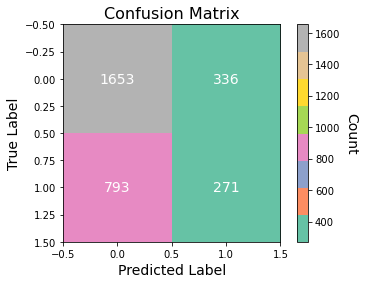

In [60]:
# Generate array of values for confusion matrix
#==> ENTER YOUR CODE HERE

# Calculate the confusion matrix
cm = confusion_matrix(y_test, preds)

# Define the color map
cmap = plt.cm.get_cmap('Set2')

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Generous', 'Generous'])

# Get the current Axes object
ax = plt.gca()

# Plot the confusion matrix with custom colors
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)

# Add text annotations for true negatives, false positives, etc.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), va='center', ha='center', color='white', fontsize=14)


# Plot confusion matrix
#==> ENTER YOUR CODE HERE

# Set plot title and labels
ax.set_title('Confusion Matrix', fontsize=16)
ax.set_xlabel('Predicted Label', fontsize=14)
ax.set_ylabel('True Label', fontsize=14)

# Show the color bar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Count', rotation=-90, va="bottom", fontsize=14)

# Show the confusion matrix plot
plt.show()

**Question:** What type of errors are more common for your model?

From the confusion matrix, we can see that Type 2 Errors (False Negatives) are more common for the model, as the count (793) is higher compared to Type 1 Errors (False Positives) with a count of 336. This means that the model is more likely to miss identifying instances where customers are actually generous (positive class) than incorrectly classifying instances as generous when they are not.

##### **Feature importance**

Use the `plot_importance` function to inspect the top 10 most important features of your final model.

<Figure size 720x432 with 0 Axes>

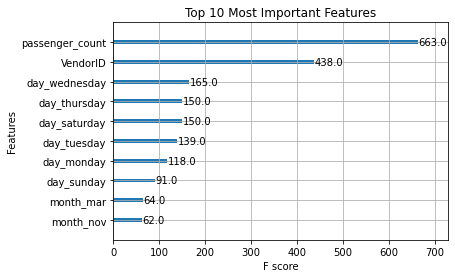

In [62]:
#==> ENTER YOUR CODE 

# Plot the feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb1.best_estimator_, max_num_features=10, importance_type='weight', title='Top 10 Most Important Features')
plt.show()


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4. Conclusion**

In this step, use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**  

2. **What was your model doing? Can you explain how it was making predictions?**   

3. **Are there new features that you can engineer that might improve model performance?**   

4. **What features would you want to have that would likely improve the performance of your model?**   

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion. Even if you cannot use the model to make strong predictions, was the work done in vain? Consider any insights that you could report back to stakeholders.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.